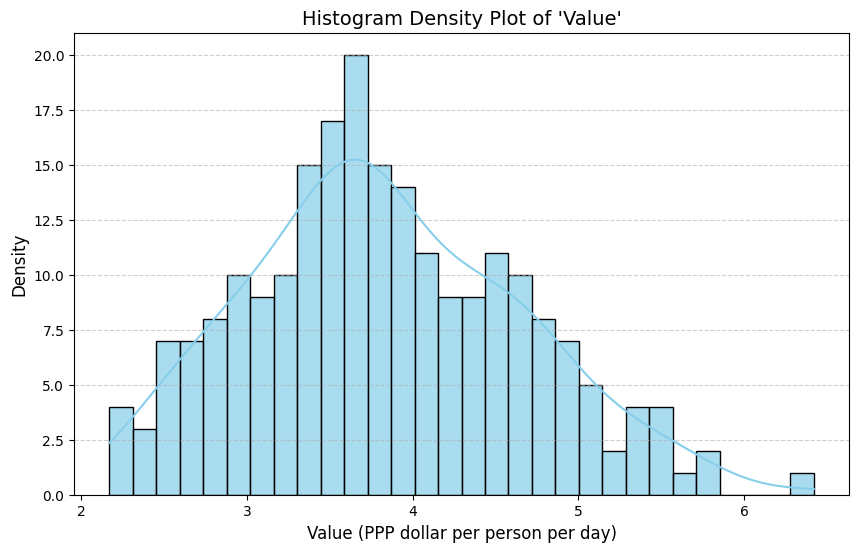

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/FAOSTAT_data_en_12-8-2024.csv'
data = pd.read_csv(file_path)

# Cleaning the data: Dropping rows with missing values in the "Value" column
cleaned_data = data.dropna(subset=["Value"])

# Plotting the histogram density plot for the "Value" column
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data["Value"], kde=True, bins=30, color='skyblue', alpha=0.7)
plt.title("Histogram Density Plot of 'Value'", fontsize=14)
plt.xlabel("Value (PPP dollar per person per day)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


<ipython-input-3-eb866e53fb6b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cleaned_data, x="Area", y="Value", palette="muted")


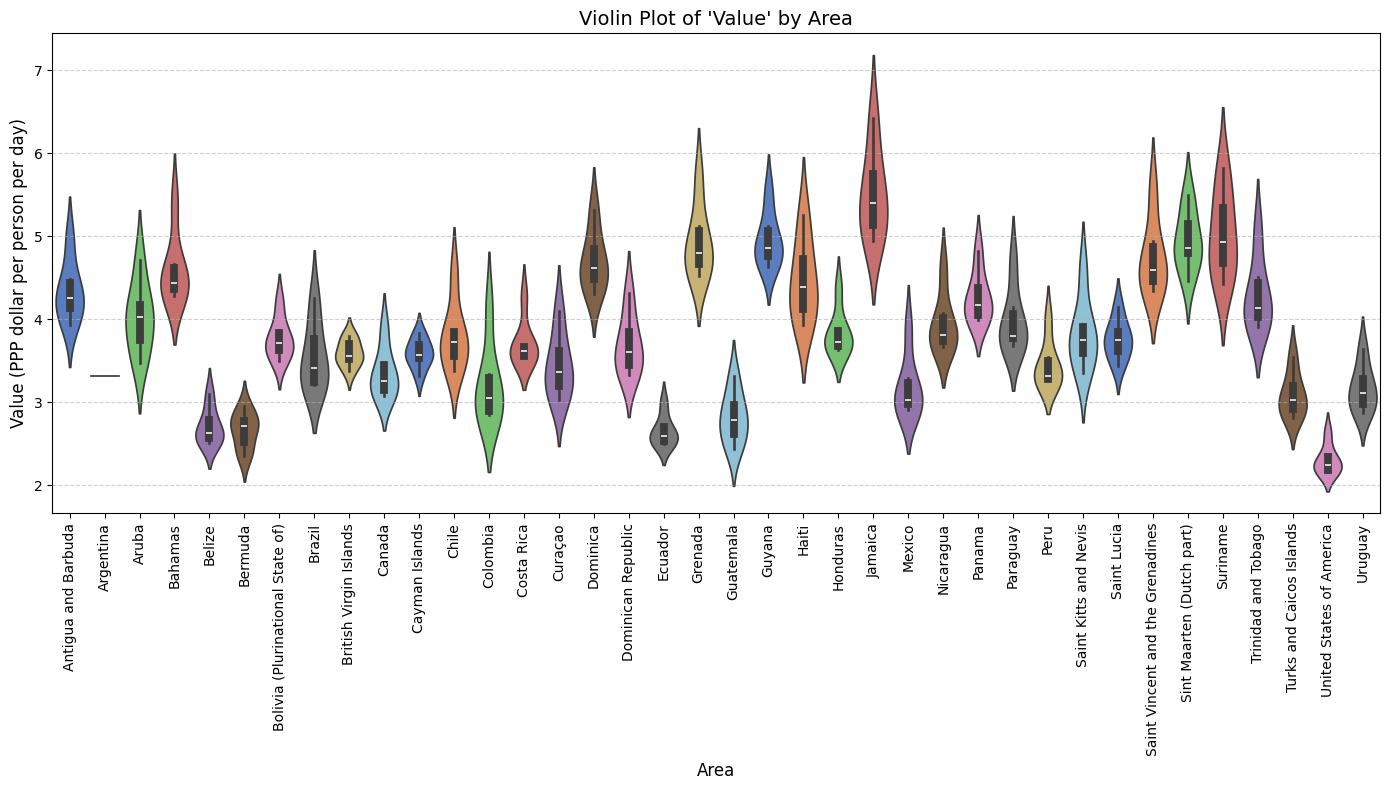

In [3]:
# Violin plot for "Value" grouped by "Area"
plt.figure(figsize=(14, 8))
sns.violinplot(data=cleaned_data, x="Area", y="Value", palette="muted")
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better readability
plt.title("Violin Plot of 'Value' by Area", fontsize=14)
plt.xlabel("Area", fontsize=12)
plt.ylabel("Value (PPP dollar per person per day)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Cleaning and preparing the data
grouped_data = cleaned_data.groupby(["Year", "Area"])["Value"].mean().reset_index()

# Setting up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Animation function
def update(year):
    ax.clear()
    year_data = grouped_data[grouped_data["Year"] == year].sort_values(by="Value", ascending=False).head(10)
    ax.barh(year_data["Area"], year_data["Value"], color='skyblue')
    ax.set_title(f"Top 10 Areas by Value in {year}", fontsize=16)
    ax.set_xlabel("Value (PPP dollar per person per day)", fontsize=12)
    ax.set_xlim(0, grouped_data["Value"].max() * 1.1)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.tick_params(axis='y', labelsize=10)

# Years to animate
years = sorted(cleaned_data["Year"].unique())

# Creating the animation
ani = FuncAnimation(fig, update, frames=years, repeat=False)

# Save or display animation
plt.close()
#ani.save("animated_bar_plot.gif", writer="imagemagick", fps=1)


In [8]:

from dash import Dash, dcc, html, dash_table, Input, Output
import pandas as pd
import plotly.express as px

# Load and prepare the cleaned dataset
cleaned_data = data.dropna(subset=["Value"])

# Aggregate data for initial display
aggregated_data = cleaned_data.groupby(["Area", "Year"]).agg({"Value": "mean"}).reset_index()

# Initialize Dash app
app = Dash(__name__)

# App Layout
app.layout = html.Div([
    html.H1("Interactive Tabular Visualization", style={"textAlign": "center"}),

    # Dropdown to select Area
    html.Div([
        html.Label("Select Area:"),
        dcc.Dropdown(
            id="area-dropdown",
            options=[{"label": area, "value": area} for area in cleaned_data["Area"].unique()],
            multi=True,
            placeholder="Select one or more areas"
        )
    ], style={"width": "40%", "display": "inline-block", "padding": "10px"}),

    # Slider to select Year range
    html.Div([
        html.Label("Select Year Range:"),
        dcc.RangeSlider(
            id="year-slider",
            min=cleaned_data["Year"].min(),
            max=cleaned_data["Year"].max(),
            marks={year: str(year) for year in sorted(cleaned_data["Year"].unique())},
            value=[cleaned_data["Year"].min(), cleaned_data["Year"].max()]
        )
    ], style={"width": "90%", "padding": "10px"}),

    # DataTable to display filtered data
    html.Div([
        dash_table.DataTable(
            id="data-table",
            columns=[
                {"name": "Area", "id": "Area"},
                {"name": "Year", "id": "Year"},
                {"name": "Average Value", "id": "Value"}
            ],
            style_table={"overflowX": "auto"},
            style_cell={"textAlign": "left", "padding": "10px", "whiteSpace": "normal"},
            page_size=10,
            sort_action="native",
            filter_action="native"
        )
    ]),

    # Graph for visualization
    html.Div([
        dcc.Graph(id="value-graph")
    ])
])

# Callback to update table and graph based on user input
@app.callback(
    [Output("data-table", "data"),
     Output("value-graph", "figure")],
    [Input("area-dropdown", "value"),
     Input("year-slider", "value")]
)
def update_output(selected_areas, year_range):
    # Filter data based on inputs
    filtered_data = aggregated_data[
        (aggregated_data["Year"] >= year_range[0]) &
        (aggregated_data["Year"] <= year_range[1])
    ]
    if selected_areas:
        filtered_data = filtered_data[filtered_data["Area"].isin(selected_areas)]

    # Create a bar chart for the filtered data
    fig = px.bar(
        filtered_data,
        x="Year",
        y="Value",
        color="Area",
        barmode="group",
        title="Average Value Over Time",
        labels={"Value": "Average Value (PPP dollars per day)"}
    )

    return filtered_data.to_dict("records"), fig

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


<IPython.core.display.Javascript object>

In [13]:
from dash import Dash, dcc, html, dash_table, Input, Output
import pandas as pd
import plotly.express as px

# Load and clean the dataset
file_path = '/content/FAOSTAT_data_en_12-8-2024.csv'
data = pd.read_csv(file_path)
cleaned_data = data.dropna(subset=["Value"])

# Aggregate data
aggregated_data = cleaned_data.groupby(["Area", "Year"]).agg({"Value": "mean"}).reset_index()

# Initialize Dash app
app = Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Interactive Tabular Visualization", style={"textAlign": "center"}),

    # Dropdown to select Area
    html.Div([
        html.Label("Select Area:"),
        dcc.Dropdown(
            id="area-dropdown",
            options=[{"label": area, "value": area} for area in cleaned_data["Area"].unique()],
            multi=True,
            placeholder="Select one or more areas"
        )
    ], style={"width": "40%", "display": "inline-block", "padding": "10px"}),

    # Slider to select Year range
    html.Div([
        html.Label("Select Year Range:"),
        dcc.RangeSlider(
            id="year-slider",
            min=int(cleaned_data["Year"].min()),
            max=int(cleaned_data["Year"].max()),
            marks={int(year): str(year) for year in cleaned_data["Year"].unique()},
            value=[int(cleaned_data["Year"].min()), int(cleaned_data["Year"].max())]
        )
    ], style={"width": "90%", "padding": "10px"}),

    # DataTable to display filtered data
    html.Div([
        dash_table.DataTable(
            id="data-table",
            columns=[
                {"name": "Area", "id": "Area"},
                {"name": "Year", "id": "Year"},
                {"name": "Average Value", "id": "Value"}
            ],
            style_table={"overflowX": "auto"},
            style_cell={"textAlign": "left", "padding": "10px", "whiteSpace": "normal"},
            page_size=10,
            sort_action="native",
            filter_action="native"
        )
    ]),

    # Graph for visualization
    html.Div([
        dcc.Graph(id="value-graph")
    ])
])

# Callback for updating table and graph
@app.callback(
    [Output("data-table", "data"),
     Output("value-graph", "figure")],
    [Input("area-dropdown", "value"),
     Input("year-slider", "value")]
)
def update_output(selected_areas, year_range):
    # Filter data based on inputs
    filtered_data = aggregated_data[
        (aggregated_data["Year"] >= year_range[0]) &
        (aggregated_data["Year"] <= year_range[1])
    ]
    if selected_areas:
        filtered_data = filtered_data[filtered_data["Area"].isin(selected_areas)]

    # Create a bar chart for the filtered data
    fig = px.bar(
        filtered_data,
        x="Year",
        y="Value",
        color="Area",
        barmode="group",
        title="Average Value Over Time",
        labels={"Value": "Average Value (PPP dollars per day)"}
    )

    return filtered_data.to_dict("records"), fig

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [12]:
from dash import Dash, dcc, html, Input, Output
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load and clean the dataset
file_path = '/content/FAOSTAT_data_en_12-8-2024.csv'
data = pd.read_csv(file_path)
cleaned_data = data.dropna(subset=["Value"])

# Aggregating the data
aggregated_data = cleaned_data.groupby(["Area", "Year"]).agg({"Value": "mean"}).reset_index()

# Initialize Dash app
app = Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Interactive Map Visualization", style={"textAlign": "center"}),

    # Dropdown to select Area
    html.Div([
        html.Label("Select Area:"),
        dcc.Dropdown(
            id="area-dropdown",
            options=[{"label": area, "value": area} for area in cleaned_data["Area"].unique()],
            multi=True,
            placeholder="Select one or more areas"
        )
    ], style={"width": "40%", "display": "inline-block", "padding": "10px"}),

    # Slider to select Year range
    html.Div([
        html.Label("Select Year Range:"),
        dcc.RangeSlider(
            id="year-slider",
            min=int(cleaned_data["Year"].min()),
            max=int(cleaned_data["Year"].max()),
            marks={int(year): str(year) for year in cleaned_data["Year"].unique()},
            value=[int(cleaned_data["Year"].min()), int(cleaned_data["Year"].max())]
        )
    ], style={"width": "90%", "padding": "10px"}),

    # Map visualization
    html.Div([
        dcc.Graph(id="map-graph")
    ])
])

# Callback to update map visualization based on user input
@app.callback(
    Output("map-graph", "figure"),
    [Input("area-dropdown", "value"),
     Input("year-slider", "value")]
)
def update_map(selected_areas, year_range):
    # Filter data based on input values
    filtered_data = aggregated_data[
        (aggregated_data["Year"] >= year_range[0]) &
        (aggregated_data["Year"] <= year_range[1])
    ]
    if selected_areas:
        filtered_data = filtered_data[filtered_data["Area"].isin(selected_areas)]

    # Create a map visualization using scatter_mapbox
    fig = go.Figure(go.Scattermapbox(
        lat=[30],  # Use latitude values of selected areas (replace with real lat/lon data)
        lon=[10],  # Use longitude values of selected areas (replace with real lat/lon data)
        mode="markers",
        marker=dict(
            size=14,
            color=filtered_data["Value"],  # Color by 'Value'
            colorscale="Viridis",  # Use color scale
            showscale=True
        ),
        text=filtered_data["Area"],  # Hover data
    ))

    fig.update_layout(
        mapbox_style="carto-positron",  # Mapbox style
        mapbox_zoom=3,  # Set zoom level
        mapbox_center={"lat": 20, "lon": 0},  # Adjust map center
        title="Value Map Over Time",
        margin={"r": 0, "t": 40, "l": 0, "b": 0}
    )

    return fig

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [14]:
import pandas as pd
import plotly.express as px

# Load the dataset (update the file path if needed)
file_path = 'FAOSTAT_data_en_12-9-2024.csv'
data = pd.read_csv(file_path)

# Clean the data
cleaned_data = data.drop(columns=['Note'])  # Drop the 'Note' column
cleaned_data.columns = [col.replace(" ", "_").lower() for col in cleaned_data.columns]  # Simplify column names

# Filter data for Gross Domestic Product
gdp_data = cleaned_data[cleaned_data['item'] == 'Gross Domestic Product']

# Create an interactive visualization
fig = px.line(
    gdp_data,
    x='year',
    y='value',
    color='area',
    title='GDP Trends by Year and Area',
    labels={'value': 'GDP (million USD)', 'year': 'Year', 'area': 'Area'},
    markers=True
)

fig.update_layout(legend_title_text='Area', hovermode='x unified')

# Display the plot
fig.show()


In [17]:
from dash import Dash, dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Load and clean the dataset
file_path = '/content/FAOSTAT_data_en_12-9-2024.csv'
data = pd.read_csv(file_path)

# Ensure 'Value' column is numeric
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')
cleaned_data = data.dropna(subset=["Value"])

# Aggregate the data
aggregated_data = cleaned_data.groupby(["Area", "Year"]).agg({"Value": "mean"}).reset_index()

# Initialize Dash app
app = Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Interactive Tabular Data and Bar Plot", style={"textAlign": "center"}),

    # Dropdown to select Area
    html.Div([
        html.Label("Select Area:"),
        dcc.Dropdown(
            id="area-dropdown",
            options=[{"label": area, "value": area} for area in cleaned_data["Area"].unique()],
            multi=True,
            placeholder="Select one or more areas"
        )
    ], style={"width": "40%", "display": "inline-block", "padding": "10px"}),

    # Slider to select Year range
    html.Div([
        html.Label("Select Year Range:"),
        dcc.RangeSlider(
            id="year-slider",
            min=int(cleaned_data["Year"].min()),
            max=int(cleaned_data["Year"].max()),
            marks={int(year): str(year) for year in cleaned_data["Year"].unique()},
            value=[int(cleaned_data["Year"].min()), int(cleaned_data["Year"].max())]
        )
    ], style={"width": "90%", "padding": "10px"}),

    # Bar plot visualization
    html.Div([
        dcc.Graph(id="bar-plot")
    ]),

    # Table visualization
    html.Div(id="table-container", style={"padding": "20px"})
])

# Callback to update bar plot and table based on user input
@app.callback(
    [Output("bar-plot", "figure"),
     Output("table-container", "children")],
    [Input("area-dropdown", "value"),
     Input("year-slider", "value")]
)
def update_visualizations(selected_areas, year_range):
    # Filter data based on input values
    filtered_data = aggregated_data[
        (aggregated_data["Year"] >= year_range[0]) &
        (aggregated_data["Year"] <= year_range[1])
    ]
    if selected_areas:
        filtered_data = filtered_data[filtered_data["Area"].isin(selected_areas)]

    # Create bar plot visualization
    bar_plot = px.bar(
        filtered_data,
        x="Year",
        y="Value",
        color="Area",
        barmode="group",
        title="Bar Plot of Values by Year and Area",
        labels={"Value": "Average Value", "Year": "Year"}
    )

    # Create table visualization
    table = html.Table(
        # Header
        [html.Tr([html.Th(col) for col in filtered_data.columns])] +
        # Body
        [html.Tr([html.Td(filtered_data.iloc[i][col]) for col in filtered_data.columns])
         for i in range(len(filtered_data))]
    )

    return bar_plot, table

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [23]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Load your dataset (replace 'your_file.csv' with the actual filename)
file_path = '/FAOSTAT_data_en_12-9-2024 (2).csv'  # Update this to your file's location
data = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = [
    'Domain Code', 'Domain', 'Food Group Code', 'Food Group',
    'Indicator Code', 'Element Code', 'Flag', 'Flag Description', 'Note'
]
cleaned_data = data.drop(columns=columns_to_drop)

# Rename columns for clarity
cleaned_data = cleaned_data.rename(columns={"Area": "Country", "Value": "Metric Value"})

# Create the interactive choropleth map with a diverging color scale
fig = px.choropleth(
    cleaned_data,
    locations="Country",
    locationmode="country names",
    color="Metric Value",
    hover_name="Country",
    animation_frame="Year",
    title="Interactive Map Visualization Over Time",
    color_continuous_scale=px.colors.diverging.Spectral,  # Change color scale for more contrast
    labels={"Metric Value": "Value", "Year": "Year"}
)

# Update layout for better readability
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    coloraxis_colorbar=dict(title="Metric Value")
)

# Show the interactive map
fig.show()
